In [136]:
import pandas as pd
import numpy as np

## 1.Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [137]:
diabetes_dataset = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\Data science\capstone datasets\Healthcare - Diabetes\health care diabetes.csv')
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [138]:
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [140]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

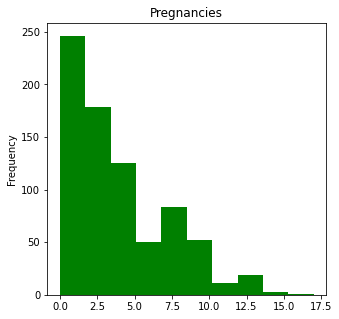

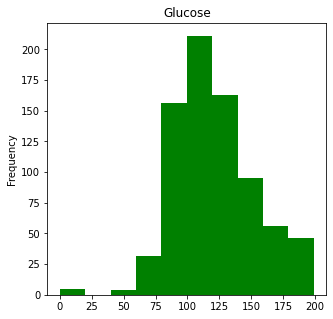

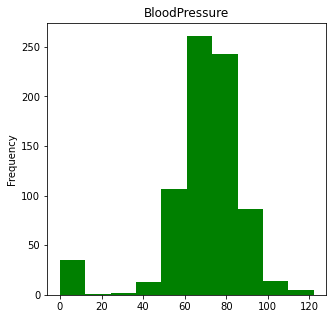

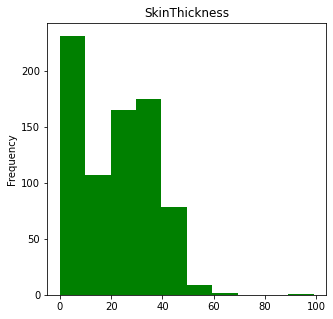

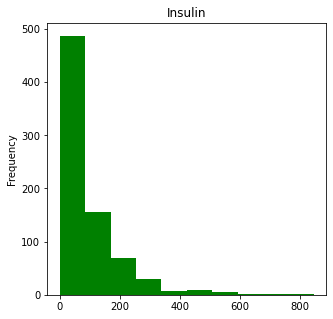

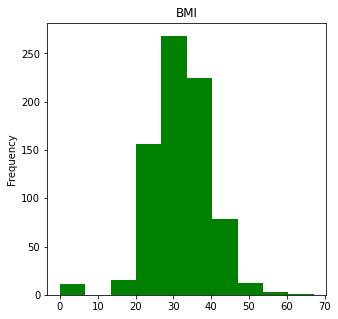

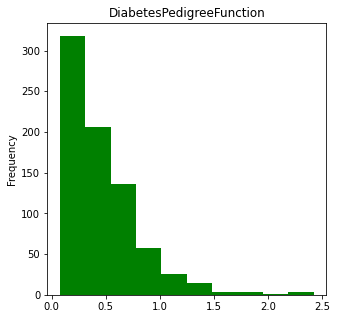

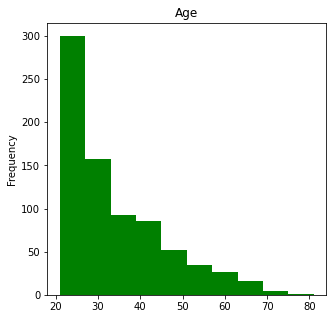

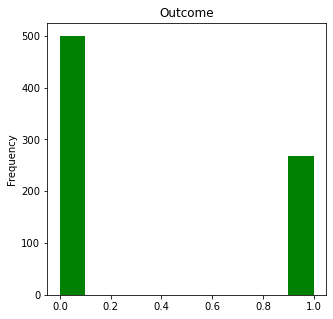

In [141]:
# visualising all the dataframe columns to identify the null values 

for x in diabetes_dataset:
    plt.figure(figsize=(5,5))
    plt.title(x)
    diabetes_dataset[x].plot(kind= 'hist',color='green')

In [142]:
#as per above histogram few columns have 0 values which needs to be removed from dataframe as o values doesnt make any sense   

mis_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [143]:
#dataset before removing 0 values 

diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [144]:
#replacing all the 0 value with nan values 

diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(to_replace=0,value= np.nan)

In [145]:
diabetes_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [146]:
print(diabetes_dataset.Glucose.mean(),
diabetes_dataset.BloodPressure.mean(),
diabetes_dataset.SkinThickness.mean(),
diabetes_dataset.Insulin.mean(),
diabetes_dataset.BMI.mean())

121.6867627785059 72.40518417462484 29.153419593345657 155.5482233502538 32.45746367239099


In [147]:
diabetes_dataset.Glucose.isna().sum()

5

In [148]:
# we can replace the nan values with the mean through the iloc function as well 

diabetes_dataset.iloc[diabetes_dataset.Glucose.isna(),1] = diabetes_dataset.Glucose.mean()

In [149]:
# we will replace all columns nan value with mean through the simple imputer function
# we can use simple imputer function for univariate 

In [150]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

diabetes_dataset[mis_col] = imputer.fit_transform(diabetes_dataset[mis_col])

diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [151]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### 3.There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [152]:
diabetes_dataset.dtypes.value_counts()

float64    6
int64      3
dtype: int64

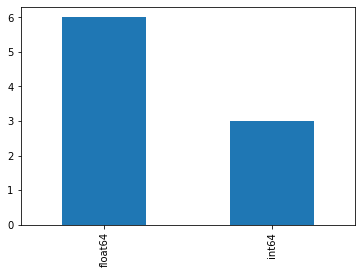

In [153]:
diabetes_dataset.dtypes.value_counts().plot(kind='bar')
plt.show()

### Data Exploration:

#### 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [154]:
# sns.pairplot - intr relation
# log reg/dec tree/naive bayes/knn/random forest

<AxesSubplot:>

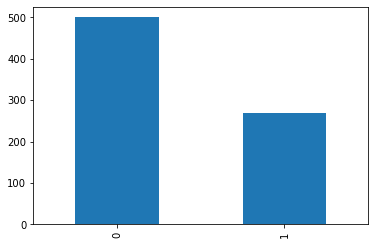

In [155]:
diabetes_dataset['Outcome'].value_counts().plot(kind = 'bar')

In [156]:
# as per the abpve value counts it seems that majority of peoples are non diabetes  

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings

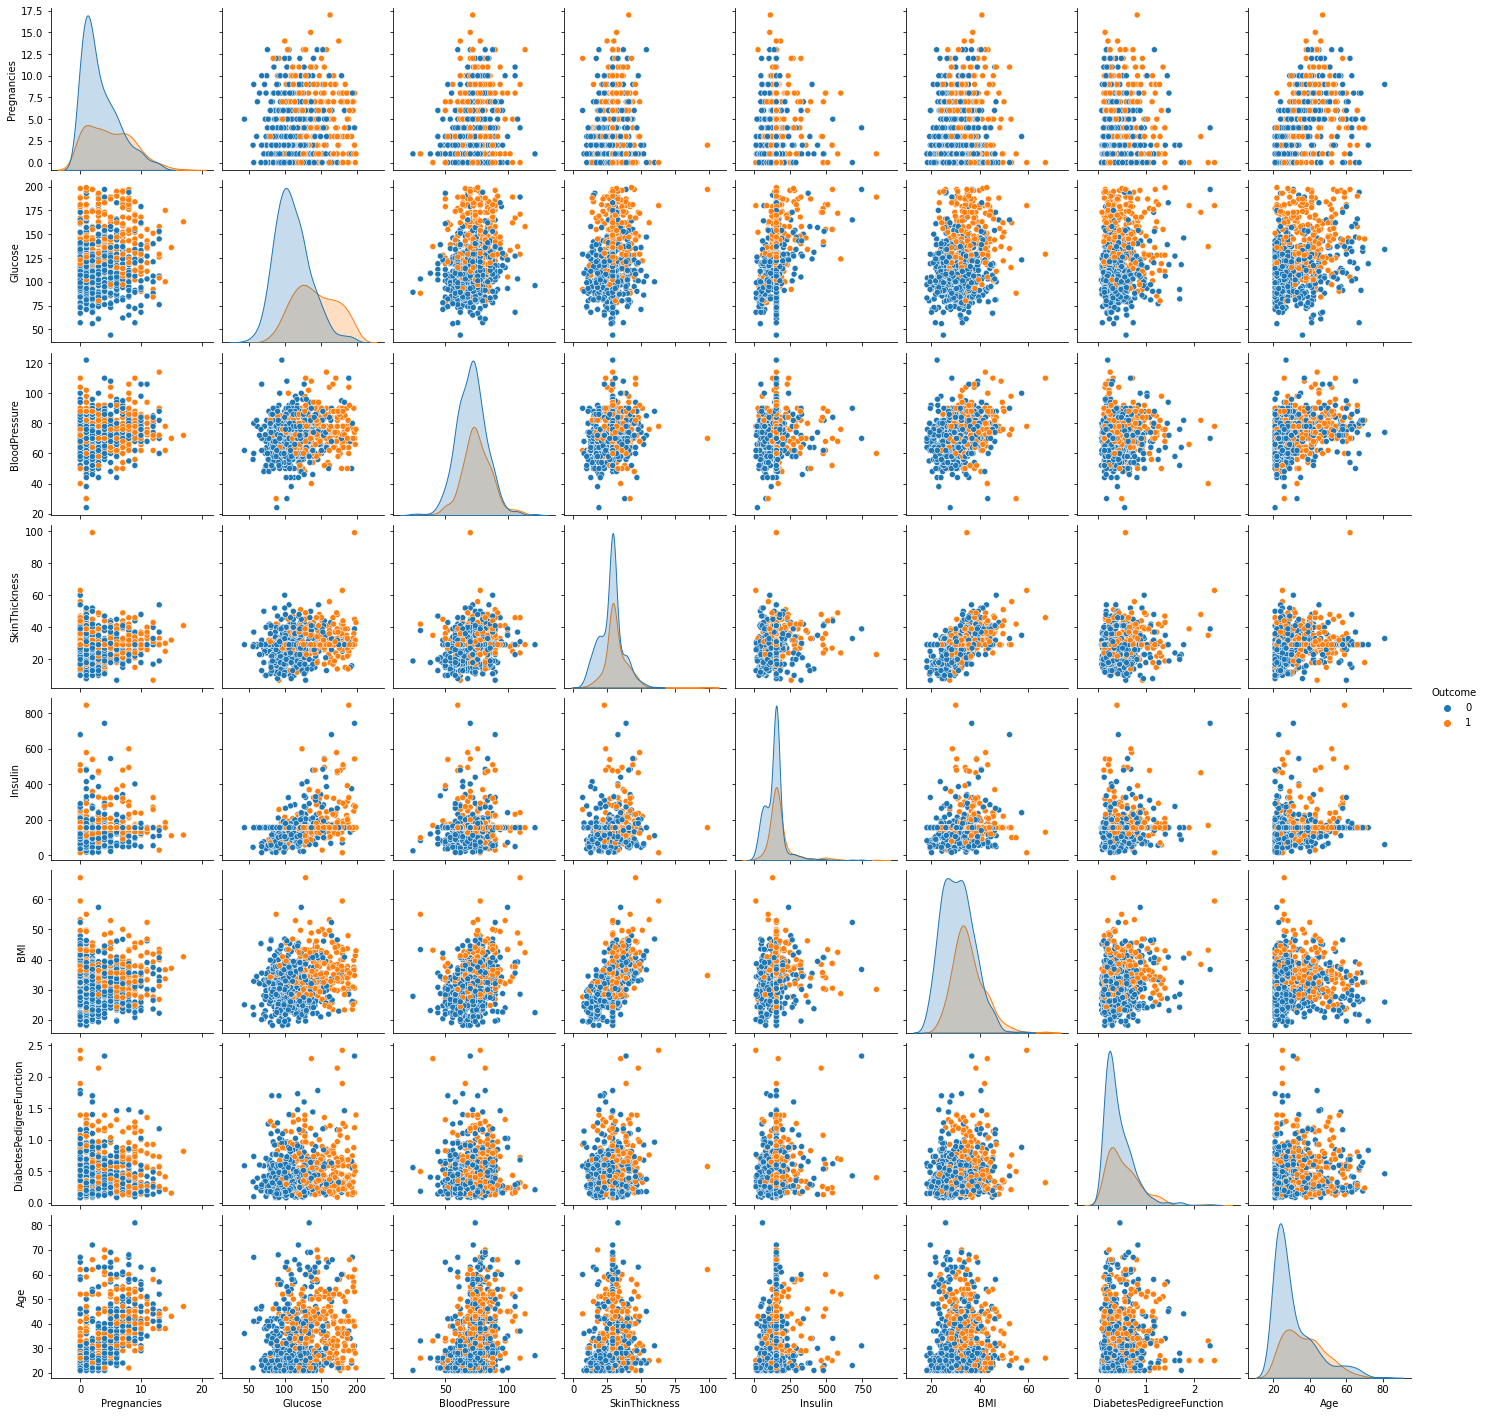

In [157]:
sns.pairplot(diabetes_dataset, hue= 'Outcome',kind= 'scatter')

In [158]:
# parplot is showing the relationship between each variables as well as spread of data by each pair

### Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot:>

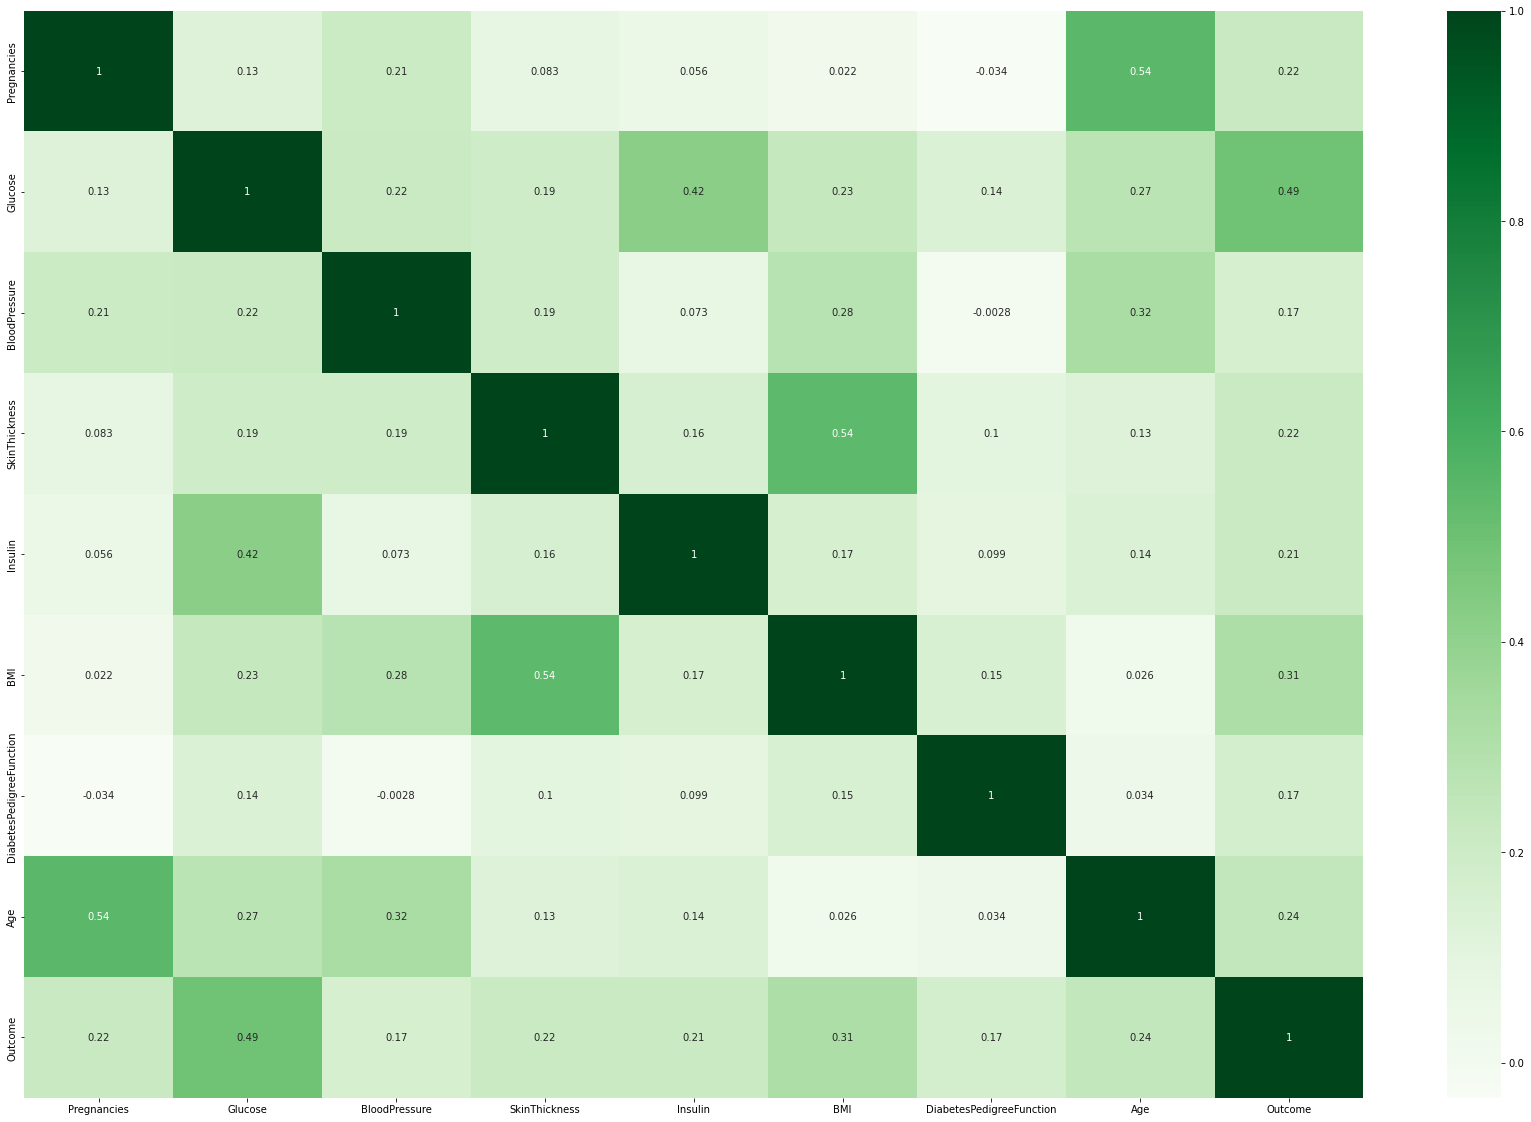

In [159]:
plt.figure(figsize=(30,20))
sns.heatmap(data= diabetes_dataset.corr(),annot= True,cmap="Greens")

In [160]:
# as per the above heatmap the correlation between 
# glucose&outcome , age&pregnancies , insulin&glucose ,bmi&skinthickness 
# to remove multicollinearity lets remove the columns which are highly correlated

In [161]:
#corr of all variables with outcome

diabetes_dataset.corr()['Outcome'].sort_values(ascending= False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

In [162]:
# dropping the columns to remove multicllinearity

diabetes_dataset.drop(columns={'Pregnancies','Insulin','SkinThickness'},inplace= True)

In [163]:
diabetes_dataset

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,33.6,0.627,50,1
1,85.0,66.0,26.6,0.351,31,0
2,183.0,64.0,23.3,0.672,32,1
3,89.0,66.0,28.1,0.167,21,0
4,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101.0,76.0,32.9,0.171,63,0
764,122.0,70.0,36.8,0.340,27,0
765,121.0,72.0,26.2,0.245,30,0
766,126.0,60.0,30.1,0.349,47,1


In [164]:
# since the data is not distributed in guassian form , i am scalling the data with the help of minmax scaller 

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler = MinMaxScaler()
scalled_df = scaler.fit_transform(diabetes_dataset)
scalled_df

array([[0.67096774, 0.48979592, 0.31492843, 0.23441503, 0.48333333,
        1.        ],
       [0.26451613, 0.42857143, 0.17177914, 0.11656704, 0.16666667,
        0.        ],
       [0.89677419, 0.40816327, 0.10429448, 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.49677419, 0.48979592, 0.16359918, 0.07130658, 0.15      ,
        0.        ],
       [0.52903226, 0.36734694, 0.24335378, 0.11571307, 0.43333333,
        1.        ],
       [0.31612903, 0.46938776, 0.24948875, 0.10119556, 0.03333333,
        0.        ]])

In [167]:
scalled_df = pd.DataFrame(scalled_df,columns= diabetes_dataset.columns)
scalled_df

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.670968,0.489796,0.314928,0.234415,0.483333,1.0
1,0.264516,0.428571,0.171779,0.116567,0.166667,0.0
2,0.896774,0.408163,0.104294,0.253629,0.183333,1.0
3,0.290323,0.428571,0.202454,0.038002,0.000000,0.0
4,0.600000,0.163265,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...
763,0.367742,0.530612,0.300613,0.039710,0.700000,0.0
764,0.503226,0.469388,0.380368,0.111870,0.100000,0.0
765,0.496774,0.489796,0.163599,0.071307,0.150000,0.0
766,0.529032,0.367347,0.243354,0.115713,0.433333,1.0


### Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

#### Logistic regression

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score

In [169]:
scalled_df.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.670968,0.489796,0.314928,0.234415,0.483333,1.0
1,0.264516,0.428571,0.171779,0.116567,0.166667,0.0
2,0.896774,0.408163,0.104294,0.253629,0.183333,1.0
3,0.290323,0.428571,0.202454,0.038002,0.000000,0.0
4,0.600000,0.163265,0.509202,0.943638,0.200000,1.0


In [170]:
x = scalled_df.drop(columns= {'Outcome'})
x.head(3)

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.104294,0.253629,0.183333


In [171]:
y = scalled_df['Outcome']
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2,random_state= 0 )

In [173]:
lr = LogisticRegression()

In [174]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [175]:
pred = lr.predict(xtest)
pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [176]:
confusion_matrix(ytest,pred)

array([[98,  9],
       [21, 26]], dtype=int64)

In [177]:
lr.score(xtest,ytest)

0.8051948051948052

In [178]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       107
         1.0       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



#### Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dtr = DecisionTreeClassifier()
dtr = dtr.fit(xtrain,ytrain)
dtr_pred = dtr.predict(xtest)

In [181]:
print (confusion_matrix(ytest,dtr_pred))
print (classification_report(ytest,dtr_pred))
print(accuracy_score(ytest,dtr_pred))

[[82 25]
 [19 28]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       107
         1.0       0.53      0.60      0.56        47

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.71      0.72       154

0.7142857142857143


### Naive bayes

In [182]:
from sklearn.naive_bayes import GaussianNB

In [183]:
gd = GaussianNB()
gd = gd.fit(xtrain,ytrain)
gd_predict = gd.predict(xtest)

In [184]:
print (confusion_matrix(ytest,gd_predict))
print (classification_report(ytest,gd_predict))
print(accuracy_score(ytest,gd_predict))

[[92 15]
 [18 29]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154

0.7857142857142857


### KNN Model

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(xtrain,ytrain)
knn_predict = model.predict(xtest)

In [187]:
print (confusion_matrix(ytest,knn_predict))
print (classification_report(ytest,knn_predict))
print(accuracy_score(ytest,knn_predict))

[[97 10]
 [18 29]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

0.8181818181818182


In [188]:
for x in range(1,40):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(xtrain,ytrain)
    knn_predict = model.predict(xtest)
    print(f'{x}: {accuracy_score(ytest,knn_predict)}')

1: 0.7207792207792207
2: 0.7207792207792207
3: 0.7467532467532467
4: 0.7792207792207793
5: 0.7727272727272727
6: 0.7922077922077922
7: 0.7792207792207793
8: 0.7922077922077922
9: 0.7792207792207793
10: 0.7857142857142857
11: 0.7922077922077922
12: 0.7857142857142857
13: 0.7987012987012987
14: 0.7922077922077922
15: 0.7922077922077922
16: 0.7857142857142857
17: 0.7922077922077922
18: 0.7792207792207793
19: 0.7857142857142857
20: 0.8181818181818182
21: 0.8051948051948052
22: 0.8051948051948052
23: 0.8181818181818182
24: 0.8116883116883117
25: 0.8116883116883117
26: 0.8051948051948052
27: 0.8116883116883117
28: 0.8051948051948052
29: 0.8116883116883117
30: 0.8116883116883117
31: 0.8181818181818182
32: 0.8181818181818182
33: 0.8181818181818182
34: 0.8116883116883117
35: 0.8051948051948052
36: 0.8181818181818182
37: 0.8116883116883117
38: 0.8116883116883117
39: 0.8051948051948052


### Random forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rfc = RandomForestClassifier(n_estimators=50,random_state= 100)
rfc = rfc.fit(xtrain,ytrain)
rfc_pred = rfc.predict(xtest)

In [191]:
print (confusion_matrix(ytest,rfc_pred))
print (classification_report(ytest,rfc_pred))
print(accuracy_score(ytest,rfc_pred))

[[94 13]
 [16 31]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       107
         1.0       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

0.8116883116883117


In [192]:
for x in range(10, 100,10):
    rfc = RandomForestClassifier(n_estimators= x ,random_state= 0)
    rfc = rfc.fit(xtrain,ytrain)
    rfc_pred = rfc.predict(xtest)
    print(f'{x} : {accuracy_score(ytest,rfc_pred)}')

10 : 0.7597402597402597
20 : 0.7987012987012987
30 : 0.7597402597402597
40 : 0.7922077922077922
50 : 0.7987012987012987
60 : 0.7857142857142857
70 : 0.7727272727272727
80 : 0.7922077922077922
90 : 0.7792207792207793


### SVM classifier

In [193]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid', gamma='auto')  
svclassifier.fit(xtrain, ytrain) 

# Prediction and Evaluation
svm_pred = svclassifier.predict(xtest)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, svm_pred))  
print(classification_report(ytest, svm_pred)) 

# Note : Note the best performance thats 100% precise

[[98  9]
 [22 25]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86       107
         1.0       0.74      0.53      0.62        47

    accuracy                           0.80       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.79      0.80      0.79       154



### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [194]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score

In [195]:
y_train_prob = lr.predict_proba(xtrain)
y_train_prob

array([[0.30704341, 0.69295659],
       [0.86960058, 0.13039942],
       [0.21681288, 0.78318712],
       ...,
       [0.91397087, 0.08602913],
       [0.86875667, 0.13124333],
       [0.35140212, 0.64859788]])

In [196]:
# lr train auc

roc_auc_score(ytrain,y_train_pred[:,1])

0.8316120341266278

In [197]:
y_test_prob = lr.predict_proba(xtest)
y_test_prob

array([[0.10326961, 0.89673039],
       [0.791794  , 0.208206  ],
       [0.88979714, 0.11020286],
       [0.3568306 , 0.6431694 ],
       [0.8023662 , 0.1976338 ],
       [0.9221512 , 0.0778488 ],
       [0.40060456, 0.59939544],
       [0.17004734, 0.82995266],
       [0.60850553, 0.39149447],
       [0.61479556, 0.38520444],
       [0.43161277, 0.56838723],
       [0.07964708, 0.92035292],
       [0.65447713, 0.34552287],
       [0.82459892, 0.17540108],
       [0.87985837, 0.12014163],
       [0.77587992, 0.22412008],
       [0.26182202, 0.73817798],
       [0.95036988, 0.04963012],
       [0.50412976, 0.49587024],
       [0.78230026, 0.21769974],
       [0.41366559, 0.58633441],
       [0.60240116, 0.39759884],
       [0.86997518, 0.13002482],
       [0.88736919, 0.11263081],
       [0.89744486, 0.10255514],
       [0.67327507, 0.32672493],
       [0.89073639, 0.10926361],
       [0.25481834, 0.74518166],
       [0.84640681, 0.15359319],
       [0.82747757, 0.17252243],
       [0.

In [198]:
# lr test roc auc
roc_auc_score(ytest,y_test_prob[:,1])

0.8592165440445416

In [199]:
 fpr,tpr,threshold = roc_curve(ytest,y_test_prob[:,1])

In [200]:
fpr

array([0.        , 0.        , 0.00934579, 0.00934579, 0.01869159,
       0.01869159, 0.04672897, 0.04672897, 0.05607477, 0.05607477,
       0.06542056, 0.06542056, 0.08411215, 0.08411215, 0.10280374,
       0.10280374, 0.11214953, 0.11214953, 0.1588785 , 0.1588785 ,
       0.1682243 , 0.1682243 , 0.18691589, 0.18691589, 0.28037383,
       0.28037383, 0.28971963, 0.28971963, 0.29906542, 0.29906542,
       0.30841121, 0.30841121, 0.3364486 , 0.3364486 , 0.39252336,
       0.39252336, 1.        ])

In [201]:
tpr

array([0.        , 0.0212766 , 0.0212766 , 0.17021277, 0.17021277,
       0.25531915, 0.25531915, 0.44680851, 0.44680851, 0.46808511,
       0.46808511, 0.53191489, 0.53191489, 0.55319149, 0.55319149,
       0.57446809, 0.57446809, 0.61702128, 0.61702128, 0.63829787,
       0.63829787, 0.65957447, 0.65957447, 0.68085106, 0.68085106,
       0.72340426, 0.72340426, 0.74468085, 0.74468085, 0.82978723,
       0.82978723, 0.85106383, 0.85106383, 0.93617021, 0.93617021,
       1.        , 1.        ])

In [202]:
threshold

array([1.92035292, 0.92035292, 0.8983844 , 0.74562964, 0.74518166,
       0.69559342, 0.6622146 , 0.58633441, 0.5853158 , 0.57695146,
       0.57468416, 0.56838723, 0.52733848, 0.50416368, 0.49587024,
       0.49489263, 0.49432694, 0.45590726, 0.4218197 , 0.41578549,
       0.397737  , 0.39759884, 0.38520444, 0.38148707, 0.32672493,
       0.32255493, 0.31933643, 0.31696346, 0.31670324, 0.30163851,
       0.29709919, 0.29619961, 0.28616581, 0.27816975, 0.25420695,
       0.24717356, 0.04963012])

In [203]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8592165440445416

<AxesSubplot:>

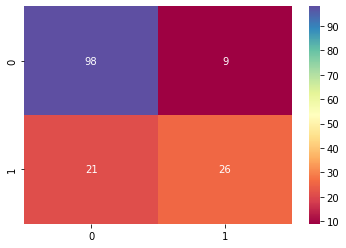

In [204]:
sns.heatmap(confusion_matrix(ytest,pred),annot= True , cmap= "Spectral")

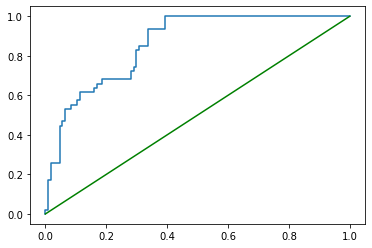

In [205]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color = "green")

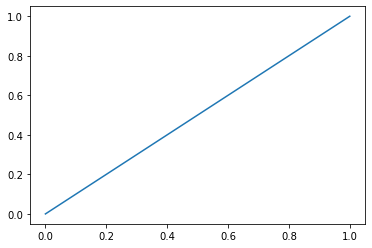

In [206]:
plt.plot([0,1],[0,1])

In [207]:
pip install scikit-plot

In [208]:
import scikitplot as skplt

In [209]:
names = ["logistic regression","Random forest",'Naive Bayes','knn','decision tree','svm classifier']

classifiers = [LogisticRegression(),RandomForestClassifier(n_estimators=50,random_state= 100),GaussianNB(),
               KNeighborsClassifier(n_neighbors=20), DecisionTreeClassifier()]

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       107
         1.0       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154




C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


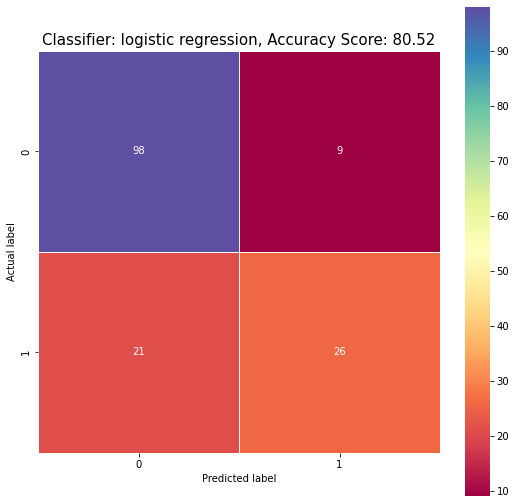

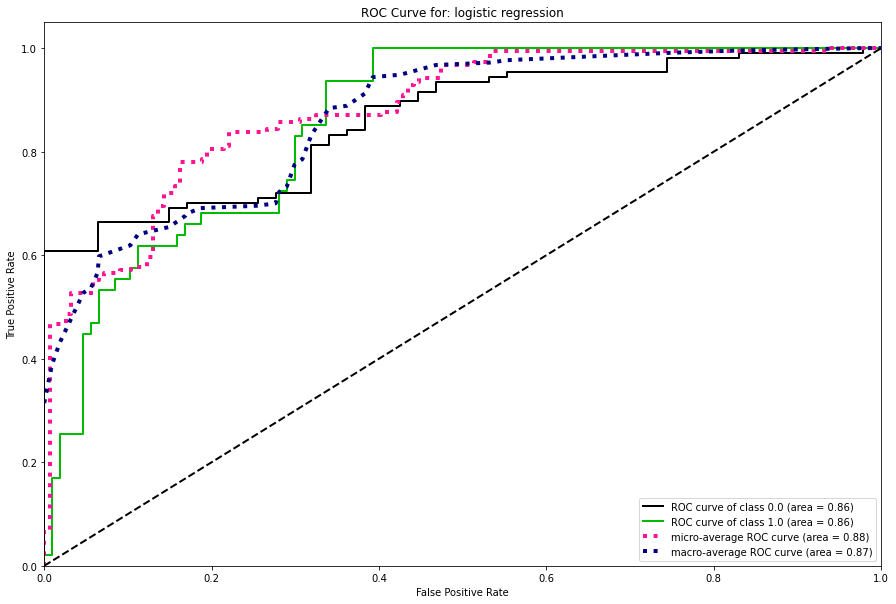


              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       107
         1.0       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154




C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


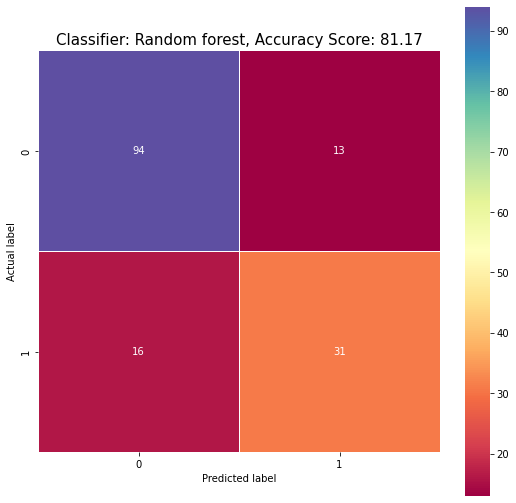

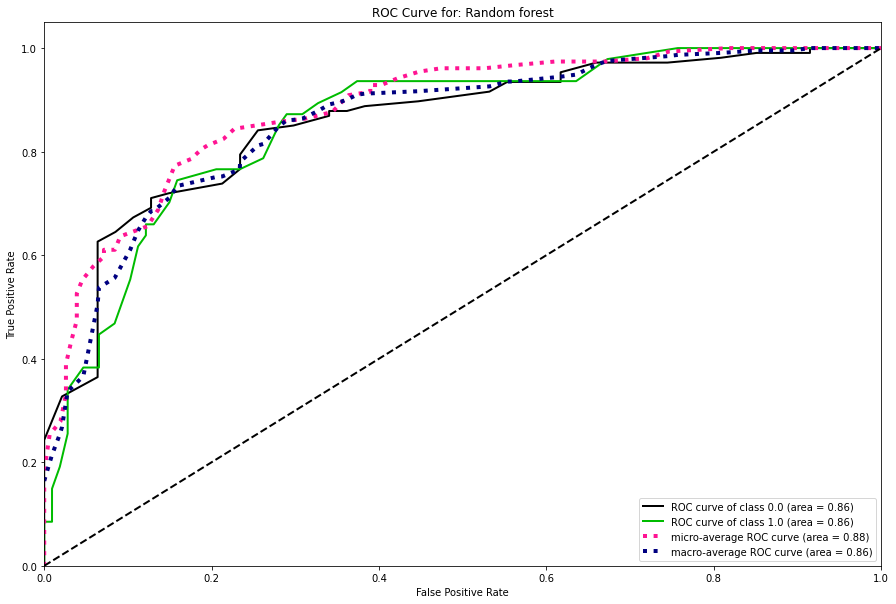


              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154




C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


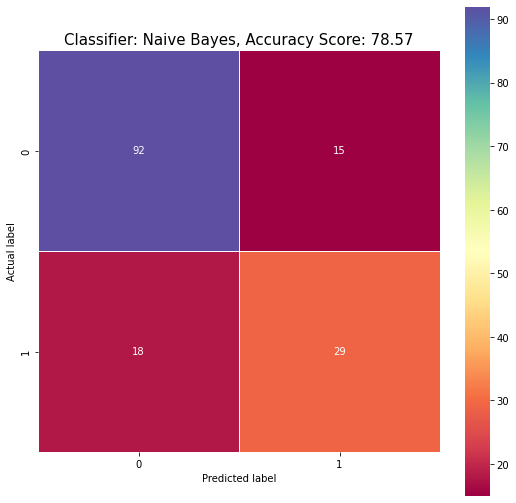

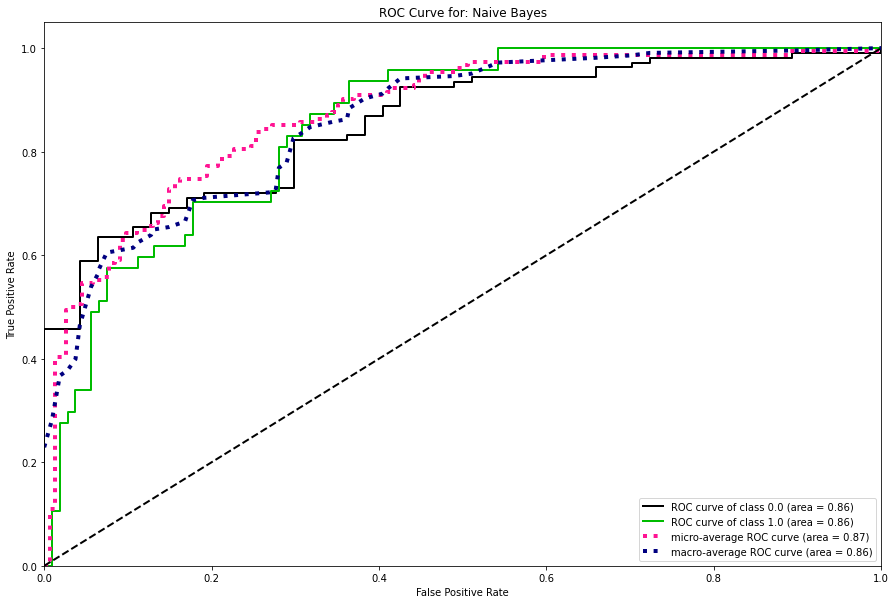


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154




C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


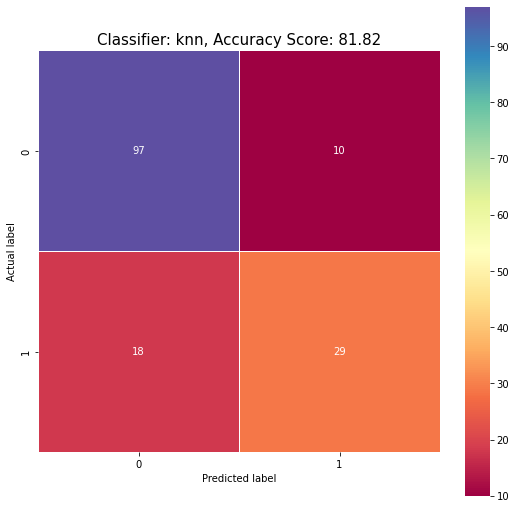

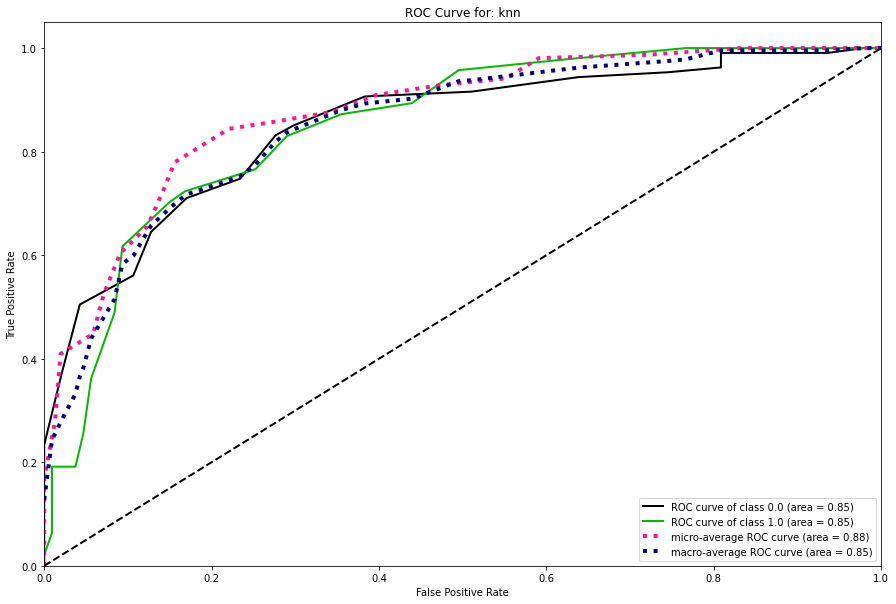


              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       107
         1.0       0.51      0.62      0.56        47

    accuracy                           0.70       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.72      0.70      0.71       154




C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


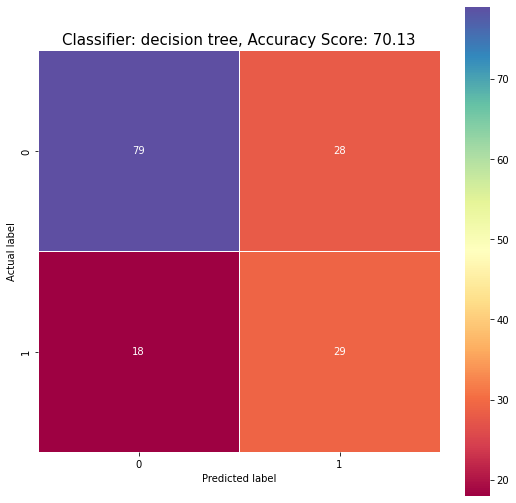

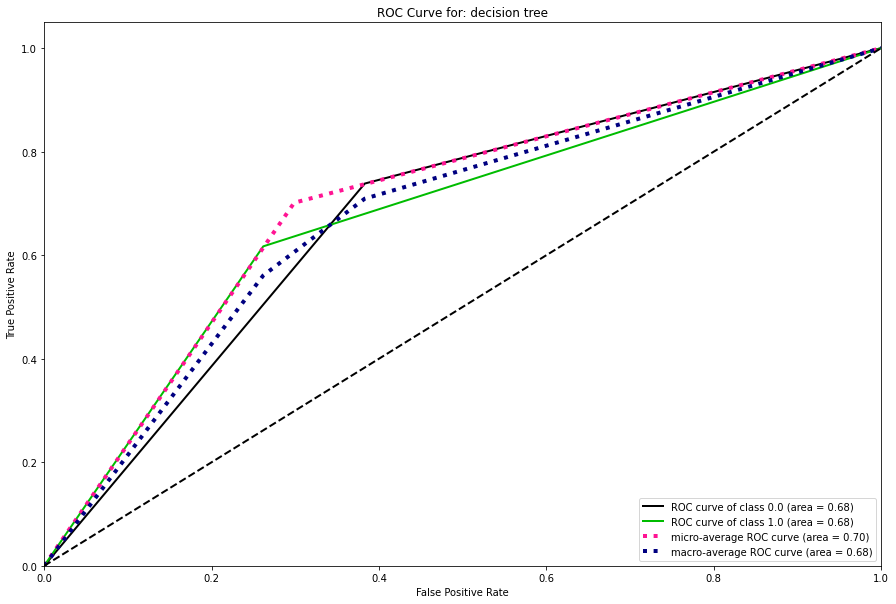

In [210]:
for name, clf in zip(names, classifiers):
 clf.fit(xtrain, ytrain)
 score = clf.score(xtest, ytest)
 pred = clf.predict(xtest)
 prob = clf.predict_proba(xtest)
 cnf_matrix = confusion_matrix(ytest, pred)
 plt.figure(figsize=(9,9))
 sns.heatmap(cnf_matrix, annot=True, linewidths=0.5,square = True, cmap = 'Spectral');
 plt.ylabel('Actual label');
 plt.xlabel('Predicted label');
 all_sample_title ='Classifier: {}, Accuracy Score: {}'.format(name, round(score*100, 2))
 plt.title(all_sample_title, size = 15);
 print(classification_report(ytest, pred))
 print()
 skplt.metrics.plot_roc_curve(ytest, prob, figsize = (15, 10), title = 'ROC Curve for: {}'.format(name))
 plt.show()
 print()

In [211]:
# as per above observation , best accuracy is 81.82 for knn model 